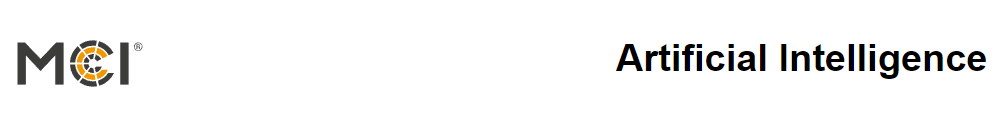

---

# 01 b Multilinear Regression 

-----
## 1. Data Science, AI und ML

Data Science is a wide field in computer science. Parts of it is strongly connected to artificial intelligence (AI). As most of AI research is in weak AI, which is also strongly linked to machine learning, this notebook trys to link the three somehow.

In a typical process in Data Science we has the following steps:
 - Get & describe problem
 - Aquire data
 - Process data
 - Analyze data
 - Develop models
 - Visualize results
 - Deploy in product

Within this process AI is often linked to every step except the first and last one. In many cases the methods that are used within the AI steps are ML based. This notebook tries to explain the process along a given example.

### 1.1. The Problem & Data Aquisition

In medicine and sports force is a highly relevent thing to measure (Problem: We need good sensors for the measurement | Get & describe problem). Let's assume a new sensor was developed to measure the force along an axis. The developed sensor and it's electronics relates the force $F$ to a voltage $U$. In an experiment (Acquire Data) weights have been applied along the axis onto the sensor and the output voltage of the sensor was measured. To do the next step (Process Data) in the process we would need to load the data to be able to process. To simplyfy thing we randomly create our data with given functions in python. To do so, we have to import several libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 120 # we do this to get bigger plots

As a next step we create the data, that normaly comes from a given experiment (Aquire data).

In [2]:
np.random.seed(42) # we do this to be able to create always the same data, so we use a given seed
F = 5 * np.random.rand(100, 1) # This numpy array represents the forces we applied to the sensor
U = 1 + 0.5 * F + 0.1 * np.random.randn(100, 1) # This numpy array represents the voltages we measured with the sensor


Most of the people like to have visual information about the given data. Seeing the data as a table or a definition (as given above) is usually less intuitive to understand. Therefore, we use a scatter plot to visualize the given data.

Text(0, 0.5, 'U / V')

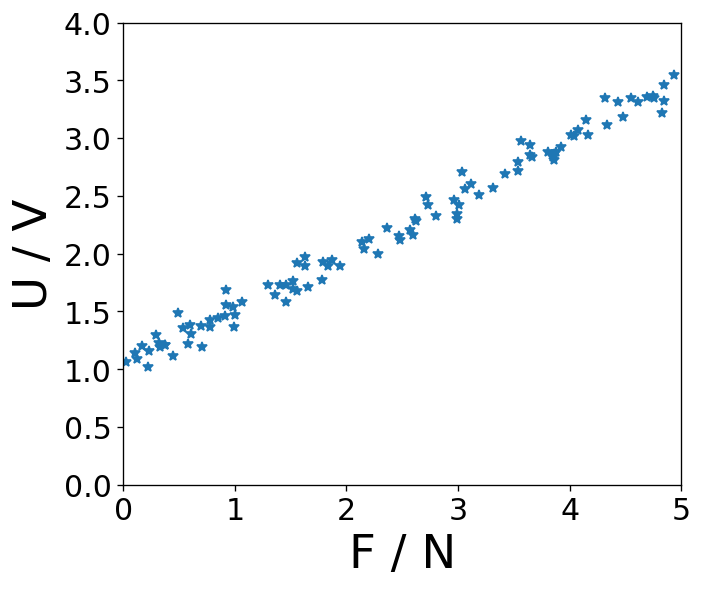

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot(F,U, '*')
plt.axis([0, 5, 0, 4])
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('F / N',fontsize=28)
plt.ylabel('U / V',fontsize=28)

### 1.2. Process and Analyze Data

The data was aquired. Now it is time to do the next step, which would be to process the given data to be able to analyze it. We would like to find the linear relation between the force $F$ and the voltage $U$. To do so, we need a linear function, with adjustable parameter to fit the function to tge given data. The linear function we want to use is given here as:

$U=p_0 + F \cdot p_1$

$p_0$...can be seen as an offset value for the voltage $U$. Therefore it has the unit $V$

$p_1$...can be seen as an linear factor for the force $F$. Therefore it has the unit $\frac{V}{N}$



#### TASK: Manual Fit
In a first step we can try to fit the data manually. To do so, set values for the $p_0$ and $p_1$ to values that fit the data best (according to an estimation of yours). Feel free to put your own code in the cell below to get something like shown in the following image:

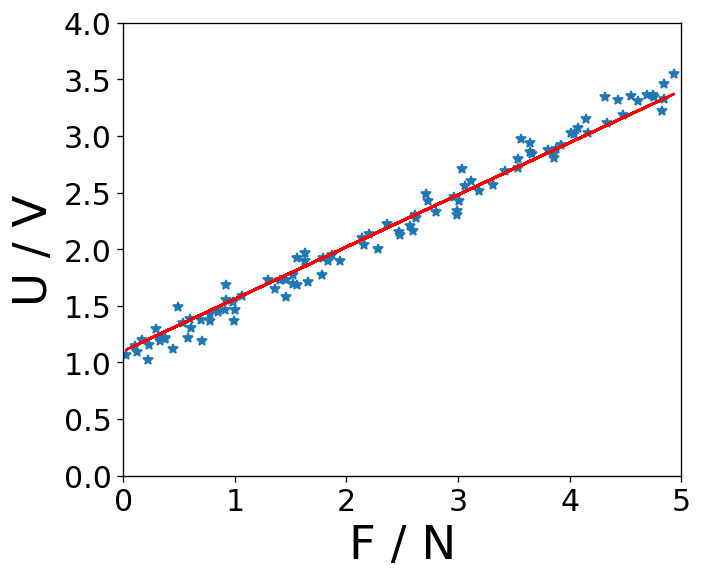

In [ ]:
# your code goes here

If you could solve the given task, congrtulations! Below there is a possible solution for you to evaluate.

Text(0, 0.5, 'U / V')

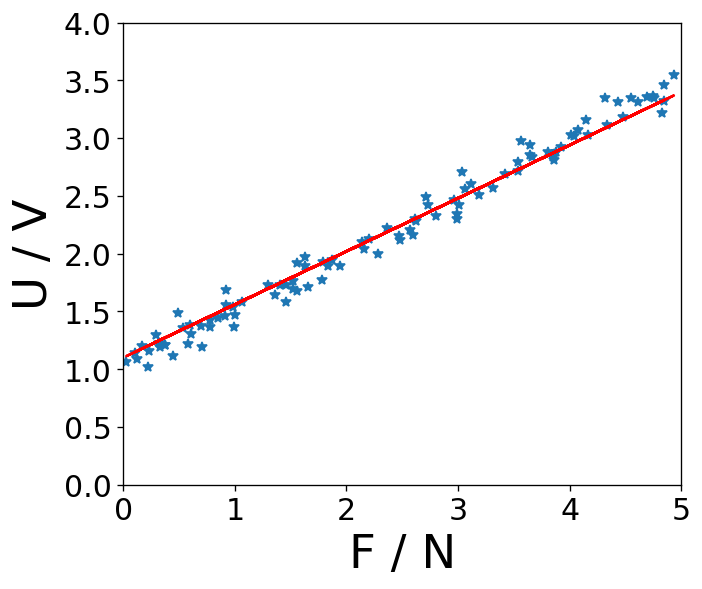

In [ ]:
p0=1.1
p1=0.46
U_manually_estimated=p0+p1*F
plt.figure(figsize=(6, 5))
plt.plot(F,U, '*')
plt.plot(F,U_manually_estimated, "r-")
plt.axis([0, 5, 0, 4])
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('F / N',fontsize=28)
plt.ylabel('U / V',fontsize=28)

With the given solutions for $p_0$ and $p_1$ a solution clould be found, but we do not know if it is the optimal one. There might be parameter sets the outperform the given solution. For that reason we have to find some sort of performance criterion that tells us how well the solution is performing. With such performance criterion we are able to compare solutions and program an algorithm, that finds the optimal solution. In data science and also in machine learning several function are available to determine such a performance criterion. The most common one in the given problem would be the mean squared error. The basic idea is to compare the real measured value with the estimation of the fit based on:


$MSE=\frac{1}{n}\sum_{i=1}^n (y_i -\hat{y}_i)^2$


$MSE$...as the mean squared error

$n$...as the number of measurements/estimations

$i$...as the index of the measurements/estimations

$y$...as the measurement value

$\hat{y}$...as the estimation value

In [ ]:
MSE=np.sum(np.power(U-U_manually_estimated,2))/len(U)
print(MSE)

0.010181201614616928


As we know, there is not only one loss function, that can be used for regression tasks. Lets have a look at other loss functions as well:

$MAE=\frac{1}{n}\sum_{i=1}^n |y_i -\hat{y}_i|$

$MBE=\frac{1}{n}\sum_{i=1}^n y_i -\hat{y}_i$

$RAE=\frac{\sum_{i=1}^n |y_i -\hat{y}_i|}{\sum_{i=1}^n |y_i -\bar{y}_i|}$, with $\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i$

$RSE=\frac{\sum_{i=1}^n (y_i -\hat{y}_i)^2}{\sum_{i=1}^n (y_i -\bar{y}_i)^2}$, with $\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i$

$RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^n (y_i -\hat{y}_i)^2}$

$MAE$...as the mean absolut error

$MBE$...as the mean biased error

$RAE$...as the relative absolut error

$RSE$...as the relative square error

$RMSE$...as the root means square error


$n$...as the number of measurements/estimations

$i$...as the index of the measurements/estimations

$y$...as the measurement value

$\hat{y}$...as the estimation value

As we want to have a look how the loss function acts on the optimization we want to find the optimal parameter with each of the loss functions. At first we need to define a linear regression model and fit the given data with it.

Intercept (p0): [1.02150962]
Slope (p1): [0.49080454]


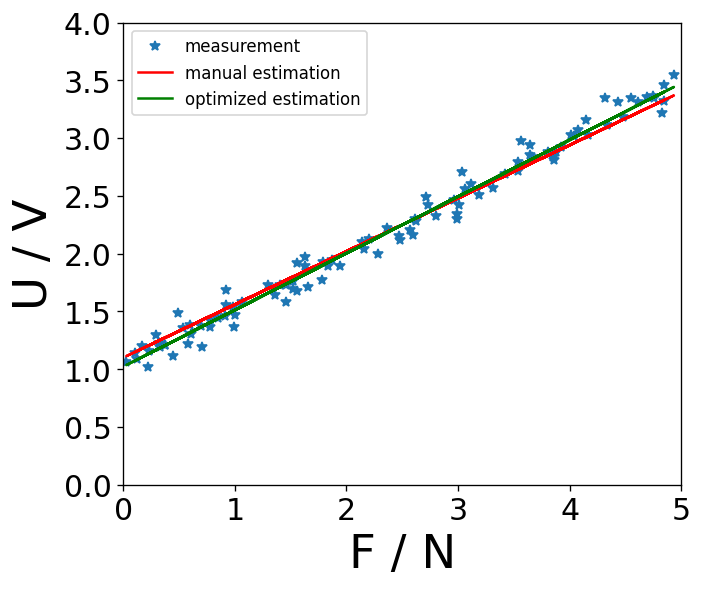

In [ ]:
from sklearn.linear_model import LinearRegression


# Create and fit the linear regression model
model = LinearRegression()
model.fit(F, U)

# Get the coefficients (intercept and slope)
p0 = model.intercept_
p1 = model.coef_[0]

# Make predictions
U_predicted = model.predict(F)

# Print coefficients
print(f"Intercept (p0): {p0}")
print(f"Slope (p1): {p1}")

# Plot results (optional)
plt.figure(figsize=(6, 5))
plt.plot(F, U, '*')
plt.plot(F,U_manually_estimated, "r-")
plt.plot(F, U_predicted, "g-")
plt.axis([0, 5, 0, 4])
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('F / N', fontsize=28)
plt.ylabel('U / V', fontsize=28)
plt.legend(['measurement','manual estimation','optimized estimation'])
plt.show()


Now lets have a look at the different errors, and how to interpret them

In [ ]:
print("manuel estimation:")

# Calculate MAE
MAE = np.sum(np.abs(U - U_manually_estimated)) / len(U)
print(f"MAE: {MAE}")

# Calculate MBE
MBE = np.sum(U - U_manually_estimated) / len(U)
print(f"MBE: {MBE}")

# Calculate RAE
y_mean = np.mean(U)
RAE = np.sum(np.abs(U - U_manually_estimated)) / np.sum(np.abs(U - y_mean))
print(f"RAE: {RAE}")

# Calculate RSE
RSE = np.sum(np.power(U - U_manually_estimated, 2)) / np.sum(np.power(U - y_mean, 2))
print(f"RSE: {RSE}")

# Calculate RMSE
RMSE = np.sqrt(MSE)
print(f"RMSE: {RMSE}")

print("optimal estimation:")

# Calculate MSE for the linear regression model's predictions
MSE_predicted = np.sum(np.power(U - U_predicted, 2)) / len(U)
print(f"MSE (Linear Regression): {MSE_predicted}")

# Calculate other metrics for the linear regression model (optional)
MAE_predicted = np.sum(np.abs(U - U_predicted)) / len(U)
print(f"MAE (Linear Regression): {MAE_predicted}")

MBE_predicted = np.sum(U - U_predicted) / len(U)
print(f"MBE (Linear Regression): {MBE_predicted}")

RAE_predicted = np.sum(np.abs(U - U_predicted)) / np.sum(np.abs(U - y_mean))
print(f"RAE (Linear Regression): {RAE_predicted}")

RSE_predicted = np.sum(np.power(U - U_predicted, 2)) / np.sum(np.power(U - y_mean, 2))
print(f"RSE (Linear Regression): {RSE_predicted}")

RMSE_predicted = np.sqrt(MSE_predicted)
print(f"RMSE (Linear Regression): {RMSE_predicted}")


manuel estimation:
MAE: 0.07975679203719357
MBE: -0.006071887341093996
RAE: 0.12458832292635817
RSE: 0.019005310396350724
RMSE: 0.10090194058895462
optimal estimation:
MSE (Linear Regression): 0.008065845639670529
MAE (Linear Regression): 0.07010426719637758
MBE (Linear Regression): 1.0436096431476471e-16
RAE (Linear Regression): 0.10951008505839749
RSE (Linear Regression): 0.01505656265277271
RMSE (Linear Regression): 0.08981005311027562


#### TASK: Discuss


*   the various loss functions
*   when to use them
*   which one was used per default from sklearn?
